<a href="https://colab.research.google.com/github/PaulLipska/Codeing_Dojo_Project_2/blob/main/Project2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project2 - Part 1: Project Selection
Independent Project Investigation

## Healthcare Dataset Stroke Data

### 1. Source of data:


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### 2. Description:


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 3. Target

Target is "Stroke" as function of contributing factors that share a commonality with people who have strokes

### 4. What does one row represent?

The row represents a patient

In [12]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSL6N5Ag95sphKFojQBp-pJBbmZeIFFMPizEDHCdXomjDZWJJlEy0vlaEFQJYCzYK1JytY6JfxdppHO/pub?output=csv'
df = pd.read_csv(url)
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


### 5. Is this a classification or regression problem?

This is a classification problem

###  6. How many features does the data have?

In [13]:
df.shape

(5110, 12)

This dataset has 12 features

### 7. How many rows are in this dataset?


5110 rows

### 8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

In [14]:
#Investigating Missing Values
df[df.isna().any(axis=1)].shape

(201, 12)

In [15]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Moderate risk in resolving missing values on what is a key indicator for risk.  Error in inputation could ruin investigation.

## Heart Failure Prediction Dataset

### 1. Source of data:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### 2. Description:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### 2. Target

The target for this investigation is heart disease as a function of predicting heart failure

### 3. What does one row represent?

In [16]:
import pandas as pd
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTlLSNmehBOPMkSLUzjyfyCdmHei2XrD4qVLq6WKZmOJHsTDKlf1BXGDS5Jlb6pWjBVIiTh1EIP4XwI/pub?output=csv'
df = pd.read_csv(URL)
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


The row is an investigation of individuals presenting an array of condtions that fall in the domanin of heart disease

### 4. Is this a classification or regression problem?

This is a classification problem since it is investigating those with and without heart disease

### 5. How many features does the data have?

In [17]:
df.shape

(918, 12)

There are 12 features

### 6. How many rows are in this dataset?

There are 918 rows

### 7. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

In [18]:
#Investigating Missing Values
df[df.isna().any(axis=1)].shape

(0, 12)

In [19]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
df.duplicated().sum()

0

There doesnt appear to be major issue with this data frame



---



# Project2 - Part 2: Heart Failure Prediction Data Set

### 1. Import Library


In [21]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### 2. Import Data Set

In [23]:
import pandas as pd
URL ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTlLSNmehBOPMkSLUzjyfyCdmHei2XrD4qVLq6WKZmOJHsTDKlf1BXGDS5Jlb6pWjBVIiTh1EIP4XwI/pub?output=csv'
df = pd.read_csv(URL)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 3. Examine Data

In [24]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


In [25]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [26]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [27]:
# Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 4. Clean the Data

#### Remove Unnecessary Columns


*   All Columns are needed




#### Remove Unnecessary Rows
Duplicates

In [28]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


# Data Dictionary

### 1. Attribute Information


1.   Age: age of the patient [years]
2.   Sex: sex of the patient [M: Male, F: Female]
3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mm/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.  Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  HeartDisease: output class [1: heart disease, 0: Normal]














### 2. Validating Data Types

In [29]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

*Since there is not strict data dictionary on Kaggle this Attribute Information is the best possible guide.  All values seem to fit nicely within the given Dtype*

### 3. Inspect Column Names for Errors

In [30]:
# Display column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

No spaces or misspelled columns

### 4. Examining Object Rows for Outliers

In [31]:
sel_obj = list(df.select_dtypes(include='object'))
sel_obj

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [32]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [33]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [34]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [35]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [36]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)



*   No unusual string values found




### 5. Missing Values

In [37]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.




*   No missing values means no imputing will be needed for this investigation



### 6. Create a Copy of the Dataset

In [38]:
# Create a copy of the dataset for Modeling
df_ml = df.copy()

# Graphing Vizualizations

Overview for the dataframe in reference to the target column of HeartDisease


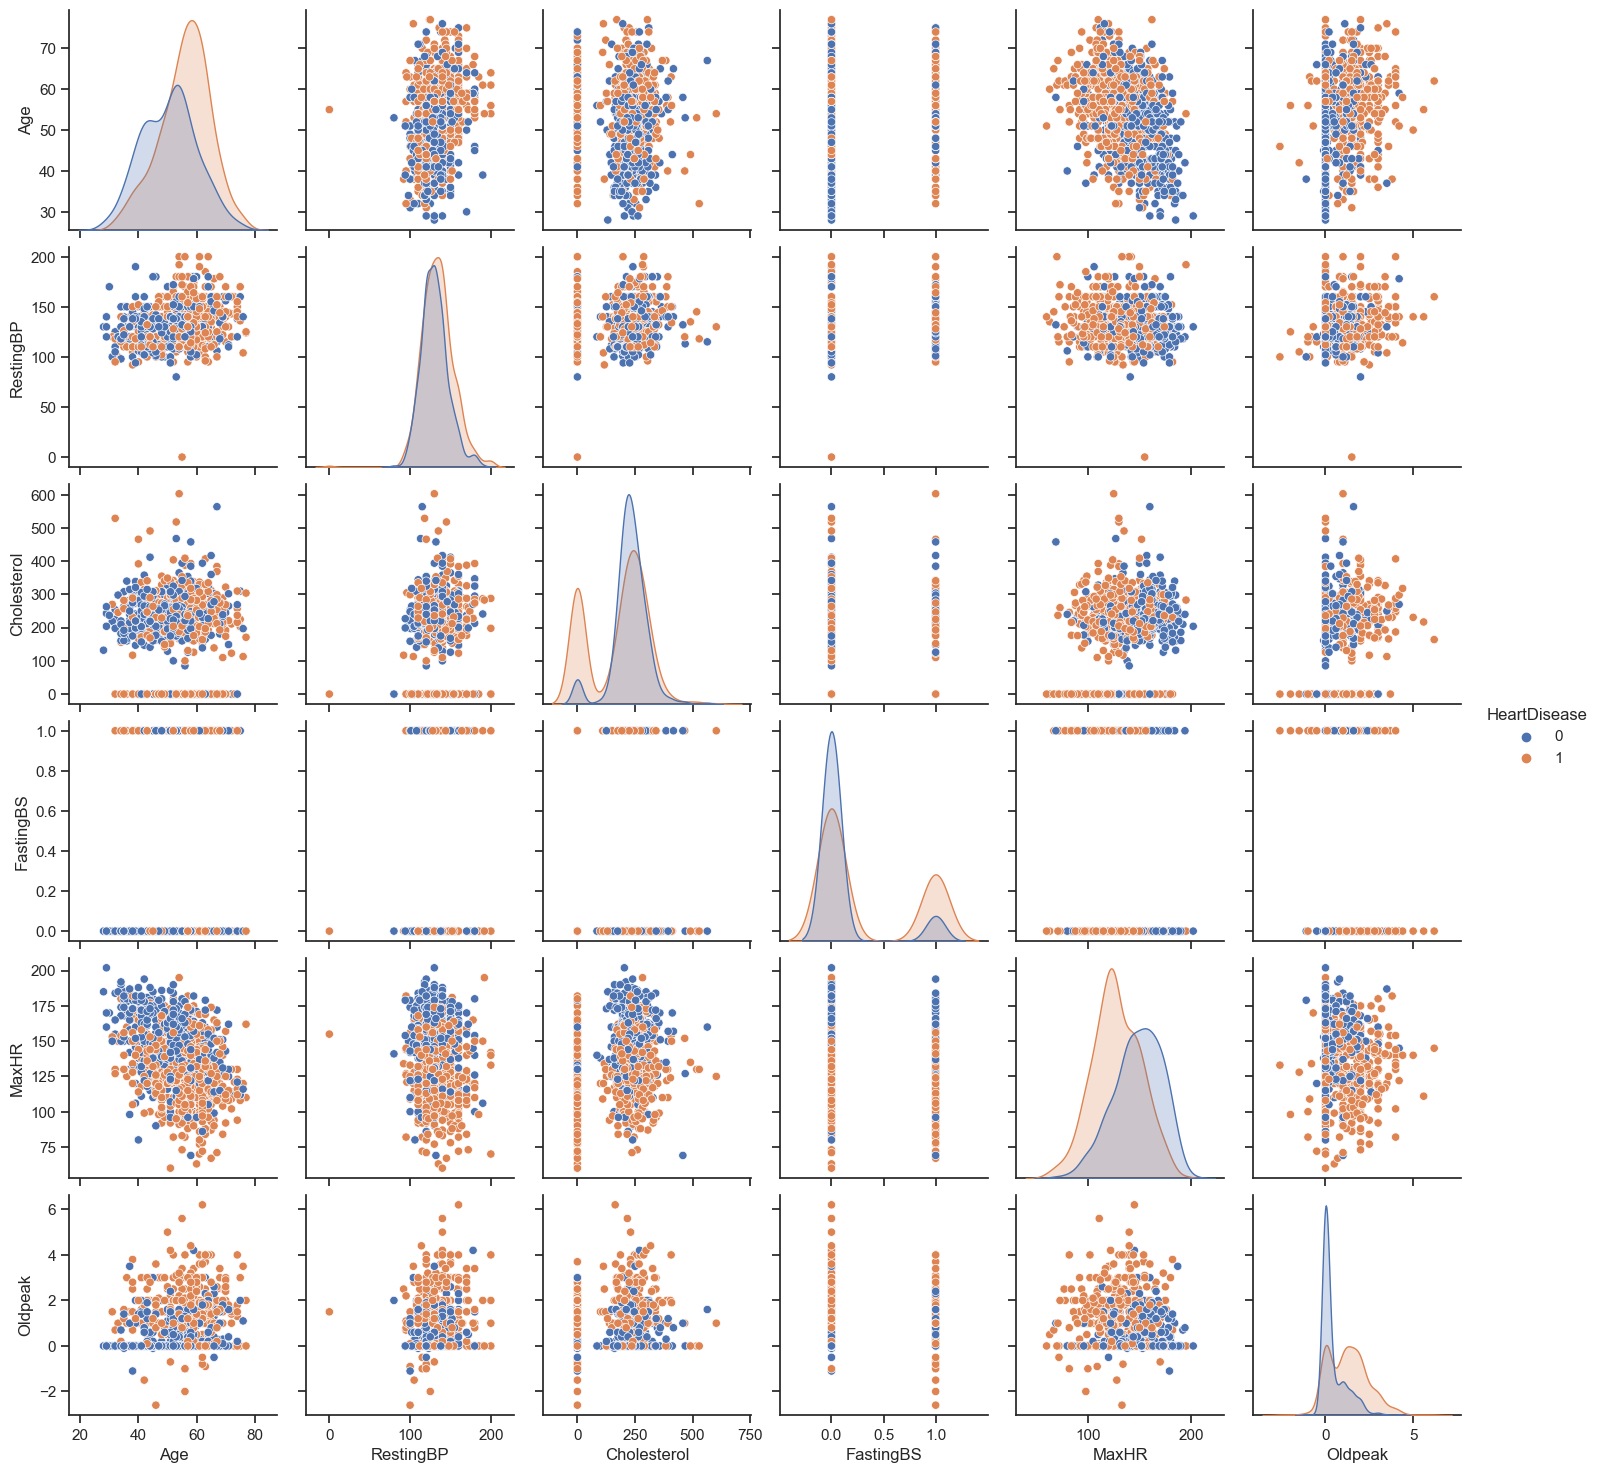

In [39]:
sns.set_theme(style="ticks")

df = df_ml
sns.pairplot(df, hue="HeartDisease")
print('Overview for the dataframe in reference to the target column of HeartDisease')

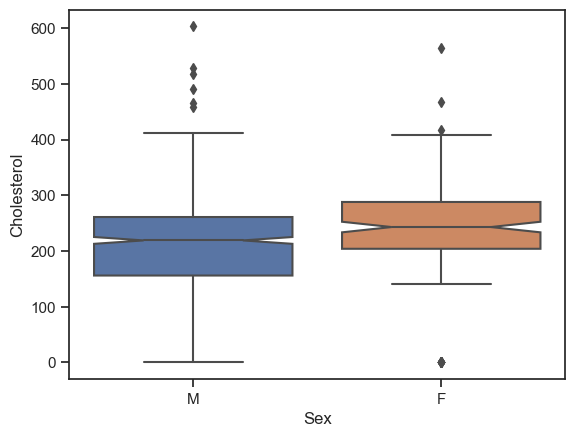

You can see cholesterol is higher in Women but Men tend to defy categorical measurement due to higher number of outliers.


In [40]:
sns.boxplot(data=df, y='Cholesterol', x='Sex', notch=True)
plt.show()
print('You can see cholesterol is higher in Women but Men tend to defy categorical measurement due to higher number of outliers.')

# Project2 - Part 3: Correlation

In [41]:
df_ml.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
df_ml.corr()

C:\Users\paull\AppData\Local\Temp\ipykernel_21592\3383299691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ml.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


C:\Users\paull\AppData\Local\Temp\ipykernel_21592\391488548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ml.corr());


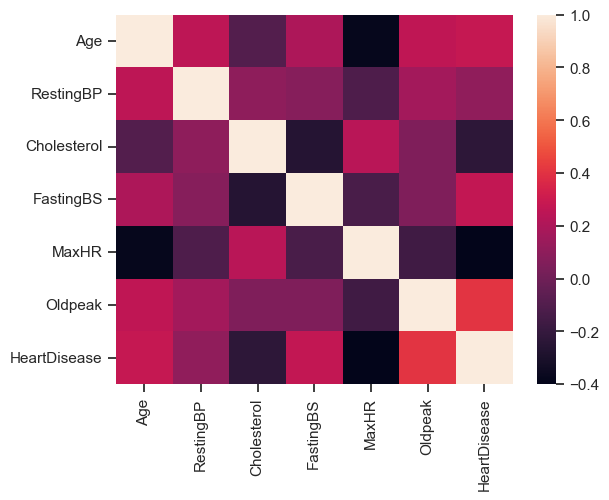

In [43]:
sns.heatmap(df_ml.corr());

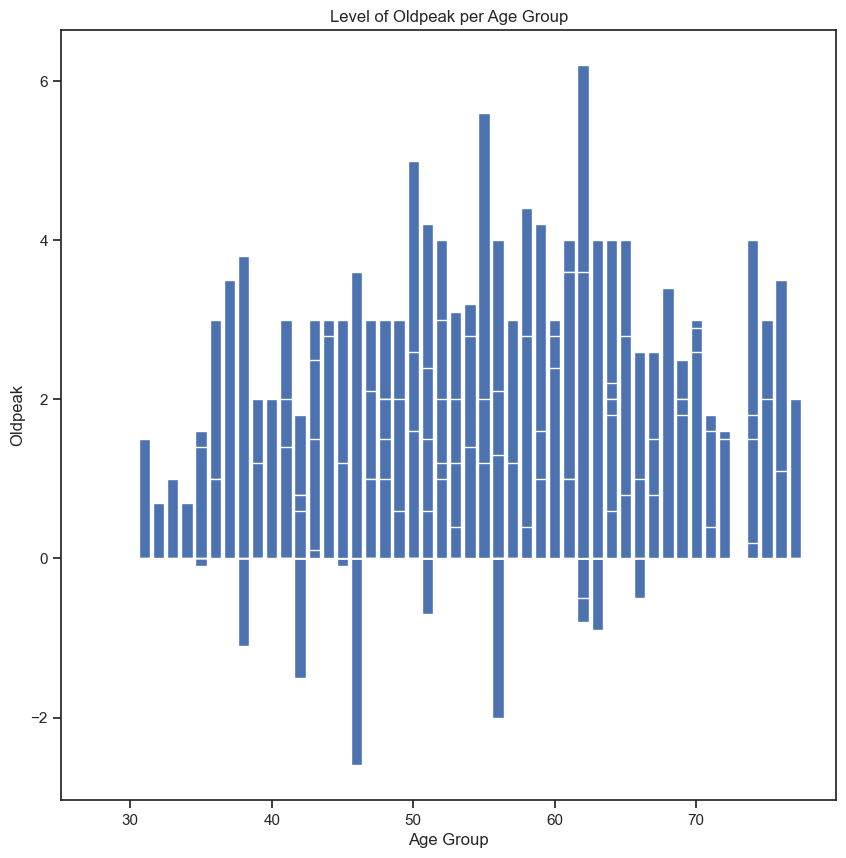

In [44]:
f, ax = plt.subplots(figsize=(10,10)) # set the size that you'd like (width, height)
plt.bar(df_ml['Age'],df_ml['Oldpeak'])
plt.xlabel('Age Group')
plt.ylabel("Oldpeak")
plt.title('Level of Oldpeak per Age Group')
plt.show()

*oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. This is a numerical value as related to the above

### OldPeak has high correlation with Heart Disease the above graph illustrates the values among age group.  This diagnostic measures the slope positive or negative from an ekg after exercise

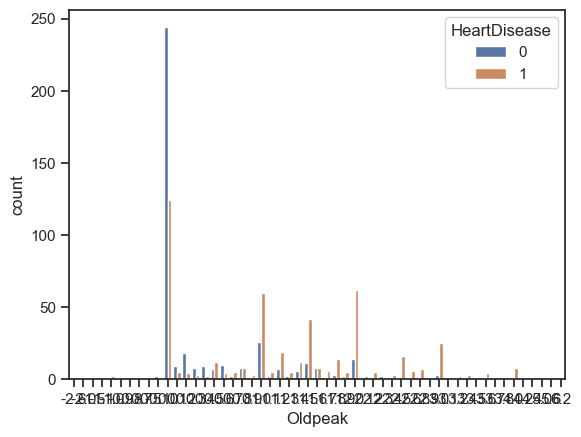

In [45]:
sns.countplot(x="Oldpeak", hue="HeartDisease", data=df_ml)
sns.set(rc={'figure.figsize':(30,10)})

#sns.countplot(y='HeartDisease',hue='Oldpeak',data=df)
#sns.set(rc={'figure.figsize':(10,10)})
#plt.xticks(rotation=90)
#plt.title('Medals by Gender in each Discipline')
#plt.legend(loc=1)  # 1 is code for 'upper right'3


### Per the previous graph you can see incidence of heart disease as it correlates with different values of Oldpeak.  The value of 0 has the highest incidence of heart disease but also the highest incidence of testing negative.  As oldpeak rises we see those testing negative plummeting.  We can reasonably infer this is an inflection point between those who have heart disease and those who are about to get it.

# Project 2 - Part 4 Model Development